# **Análisis de Comportamiento de Clientes con Tarjetas de Crédito por Antigüedad**

INTEGRANTES:
              
*   Buestan Nancy
*   Robles Vanessa
*   Arreaga Ingrid

MODULO:

*   M6-Marketing Digital y Segmentación de Clientes CI-PBA

# Import libraries


In [ ]:
!pip install scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons
from google.colab import drive


# Load the dataset


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Varios/M6/ProyectoM6/CC_GENERAL.csv')

# Exploratory Data Analysis


# Data Processing


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
for column in data.select_dtypes(include=['object']).columns:
  print(f"\nVariable: {column}")
  categorias = data[column].unique()
  print(categorias)


Variable: CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']


In [ ]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000    

<Figure size 1600x1000 with 0 Axes>

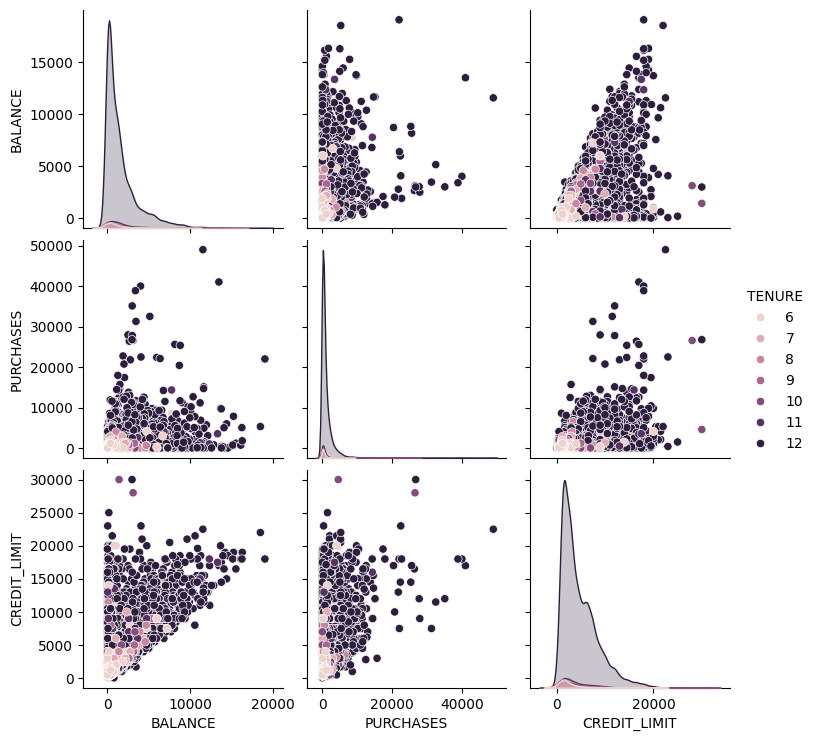

In [ ]:
cluster_cols = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']

plt.figure(1, figsize=(16, 10))
sns.pairplot(data=data[cluster_cols + ['TENURE']], hue='TENURE')
plt.show()


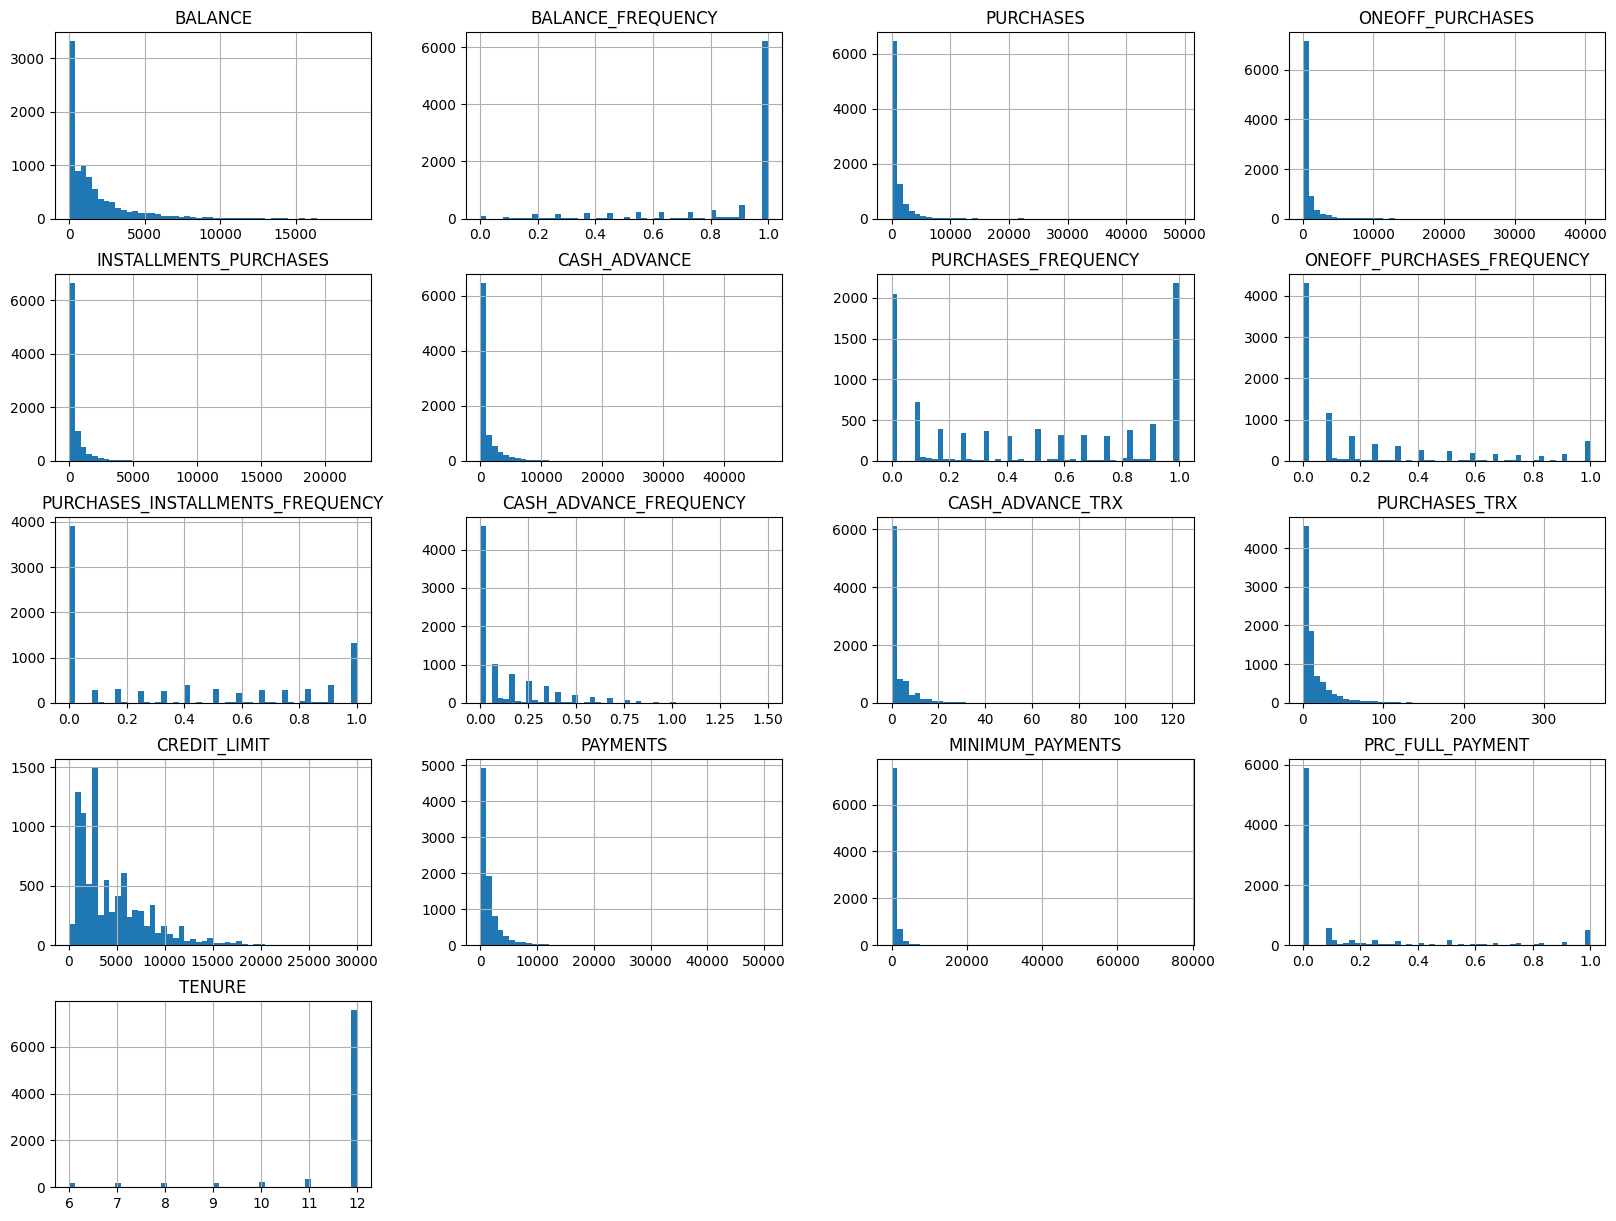

In [ ]:
 # Visualización de la distribución de variables numéricas
data.hist(bins=50, figsize=(20,15))
plt.show()

Muchas de las variables, como BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS y MINIMUM_PAYMENTS, tienen distribuciones sesgadas a la derecha. Esto significa que la mayoría de los clientes tienen valores bajos en estas variables, pero hay algunos con valores muy altos. Ejemplos de lo que podemos inferir:


*   La mayoría de los clientes tienen un balance bajo.
*   Hay pocos clientes que hacen compras o avances en efectivo de montos muy elevados.
*   Pocos clientes tienen límites de crédito extremadamente altos.

Variables como BALANCE_FREQUENCY, PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY y ONEOFF_PURCHASES_FREQUENCY parecen tener una tendencia a valores cercanos a 1. Esto sugiere que muchos clientes realizan transacciones con bastante frecuencia, probablemente en cada ciclo.

En particular, BALANCE_FREQUENCY y PURCHASES_FREQUENCY muestran una concentración fuerte en valores cercanos a 1, lo que podría implicar que la mayoría de los clientes revisan sus balances y realizan compras de manera regular.

La variable TENURE está altamente concentrada en los valores más altos, lo que podría significar que muchos clientes tienen una relación larga con la institución (aproximadamente 12 meses).

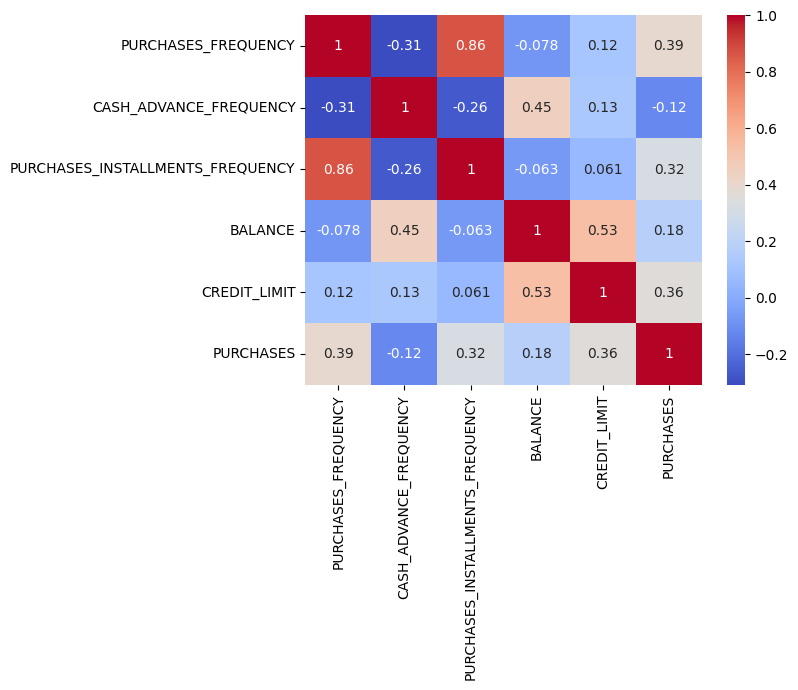

In [ ]:
# Correlación entre frecuencias y otras variables
frequencies = ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']
other_variables = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES']

correlation_matrix = data[frequencies + other_variables].corr()

# Visualizar la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Data Cleaning


In [ ]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Se identifica que las variables con nulos es Float por lo que se rellena con un valor predeterminado
data2 = data.fillna(0)

In [ ]:
data2.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


## Feature Engineering
Se propone las 4 nuevas características:

*   Ratio de compras en efectivo a compras totales.
*   Promedio de compras por transacción.   
*   Categoria de Saldo
*   Categoria antiguedad





In [ ]:
# Reemplazar posibles infinitos generados por divisiones entre cero
data2.replace([float('inf'), -float('inf')], 0, inplace=True)

In [ ]:
# Definir los límites de cada categoría de saldo
def categorize_balance(balance):
    if balance < 100000:
        return 'Saldo bajo'
    elif 100000 <= balance < 150000:
        return 'Saldo medio'
    else:
        return 'Saldo alto'

In [ ]:
# Definir los límites de cada categoría de antigüedad
def categorize_tenure(tenure):
    if tenure < 5:
        return 'Cliente Nuevo'
    elif 5 <= tenure < 8:
        return 'Cliente Estable'
    else:
        return 'Cliente Antiguo'

In [ ]:
data2['CASH_TO_PURCHASE_RATIO'] = data2['CASH_ADVANCE'] / data2['PURCHASES']

In [ ]:
data2['AVG_PURCHASE_PER_TRX'] = data2['PURCHASES'] / data2['PURCHASES_TRX']

In [ ]:
data2.replace([float('inf'), -float('inf')], 0, inplace=True) # Reemplazar posibles infinitos generados por divisiones entre cero

In [ ]:
# Crear una nueva columna categorizada
data2['BALANCE_CATEGORIA'] = data2['BALANCE'].apply(categorize_balance)
data2['TENURE_CATEGORIA'] = data2['TENURE'].apply(categorize_tenure)

In [ ]:
print(data2)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [ ]:
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_CATEGORIA,TENURE_CATEGORIA
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Saldo bajo,Cliente Antiguo
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Saldo bajo,Cliente Antiguo
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Saldo bajo,Cliente Antiguo
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,Saldo bajo,Cliente Antiguo
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Saldo bajo,Cliente Antiguo


## Realizar codificación de features categóricos

CUST_ID es la unica variable categorica, pero lo mejor es eliminar esa columna en lugar de codificarla. Esto es porque la codificación de un identificador único no proporciona información adicional y puede incluso afectar negativamente el rendimiento de los modelos.

## Encoding


In [ ]:
null_columns = data2.columns[data2.isnull().any()]
print("Columnas con valores nulos:", null_columns.tolist())

Columnas con valores nulos: []


In [ ]:
data2.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
all_vars = data2.columns
print(all_vars)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'BALANCE_CATEGORIA', 'TENURE_CATEGORIA'],
      dtype='object')


In [ ]:

numeric_vars = list(data2[all_vars].select_dtypes(include=[np.number]).columns)
#data2['BALANCE_CATEGORIA'] = data2['BALANCE_CATEGORIA'].astype(str)
#data2['TENURE_CATEGORIA'] = data2['TENURE_CATEGORIA'].astype(str)

str_vars = list(data2[all_vars].select_dtypes(include=["object"]).columns)
str_vars

['BALANCE_CATEGORIA', 'TENURE_CATEGORIA']

Dado que parece haber outliers en algunas de las columnas,  según los gráficos de distribuciones, puede ser mejor aplicar RobustScaler para reducir el impacto de esos valores extremos.

In [ ]:
columns_to_scale = ['BALANCE', 'PAYMENTS']

In [ ]:
data2[columns_to_scale] = scaler.fit_transform(data2[columns_to_scale])

## Scaling (if needed)


Dado que parece haber outliers en algunas de las columnas,  según los gráficos de distribuciones, puede ser mejor aplicar RobustScaler para reducir el impacto de esos valores extremos.

In [ ]:
def porcentaje_nulos_por_fila(df):
    porcentaje_nulos = data2.isnull().mean(axis=1) * 100
    return porcentaje_nulos

porcentaje_nulos = porcentaje_nulos_por_fila(data2)
porcentaje_nulos


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8945,0.0
8946,0.0
8947,0.0
8948,0.0


In [ ]:
data2["porcentaje_nulos"]=porcentaje_nulos
data2["porcentaje_nulos"].describe()

,porcentaje_nulos
count,8950.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
all_vars = list(data2.drop(columns=["porcentaje_nulos"]).columns)
all_vars


['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'BALANCE_CATEGORIA',
 'TENURE_CATEGORIA']

In [ ]:
numeric_vars = list(data2[all_vars].select_dtypes(include=[np.number]).columns)
numeric_vars

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Crear un transformer para las columnas numéricas (escalado)
numeric_transformer = MinMaxScaler()

# Crear un transformer para las columnas categóricas (OneHotEncoder)
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Crear un ColumnTransformer que aplique el escalado y OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_vars),
        ('cat', categorical_transformer, str_vars)
    ])

In [ ]:
# Ajustar y transformar los datos con el preprocesador
preprocessed_data = preprocessor.fit_transform(data2)

# Mostrar los datos preprocesados
print(preprocessed_data)

[[2.14779454e-03 8.18182000e-01 1.94536779e-03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.68169097e-01 9.09091000e-01 0.00000000e+00 ... 2.22222000e-01
  1.00000000e+00 0.00000000e+00]
 [1.31026136e-01 1.00000000e+00 1.57662475e-02 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [1.22871936e-03 8.33333000e-01 2.94456089e-03 ... 2.50000000e-01
  0.00000000e+00 1.00000000e+00]
 [7.06688341e-04 8.33333000e-01 0.00000000e+00 ... 2.50000000e-01
  0.00000000e+00 1.00000000e+00]
 [1.95717777e-02 6.66667000e-01 2.22932216e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [ ]:
# Obtener los nombres de las columnas resultantes del One-Hot Encoder
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(str_vars)

# Crear el nuevo DataFrame con los datos preprocesados
df_preprocessed = pd.DataFrame(preprocessed_data, columns=numeric_vars + list(categorical_feature_names))

# Mostrar el nuevo DataFrame
print("DataFrame preprocesado:")
print(df_preprocessed)

DataFrame preprocesado:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.002148           0.818182   0.001945          0.000000   
1     0.168169           0.909091   0.000000          0.000000   
2     0.131026           1.000000   0.015766          0.018968   
3     0.087521           0.636364   0.030567          0.036775   
4     0.042940           1.000000   0.000326          0.000393   
...        ...                ...        ...               ...   
8945  0.001496           1.000000   0.005936          0.000000   
8946  0.001007           1.000000   0.006118          0.000000   
8947  0.001229           0.833333   0.002945          0.000000   
8948  0.000707           0.833333   0.000000          0.000000   
8949  0.019572           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685       

In [ ]:
print(df_preprocessed.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000      

## # Train model/Tune hyperparameters

Explique el criterio utilizado

In [ ]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_preprocessed, kmeans.labels_))

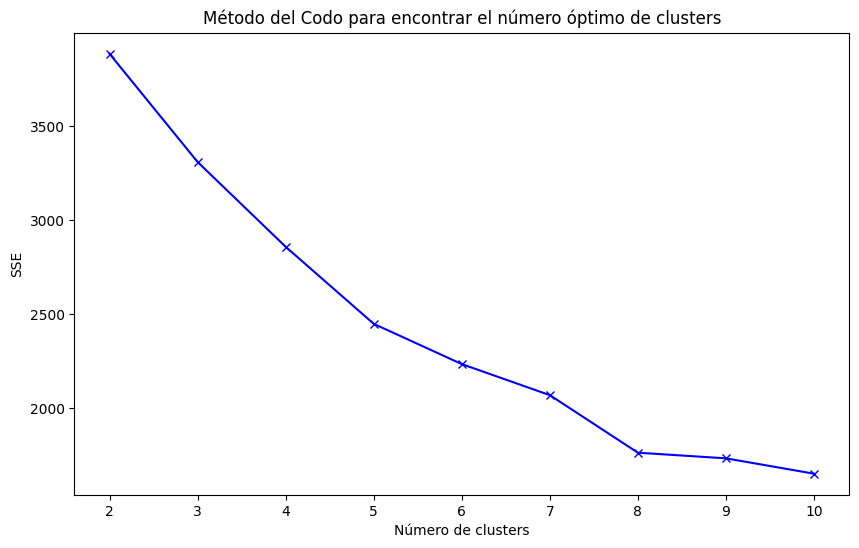

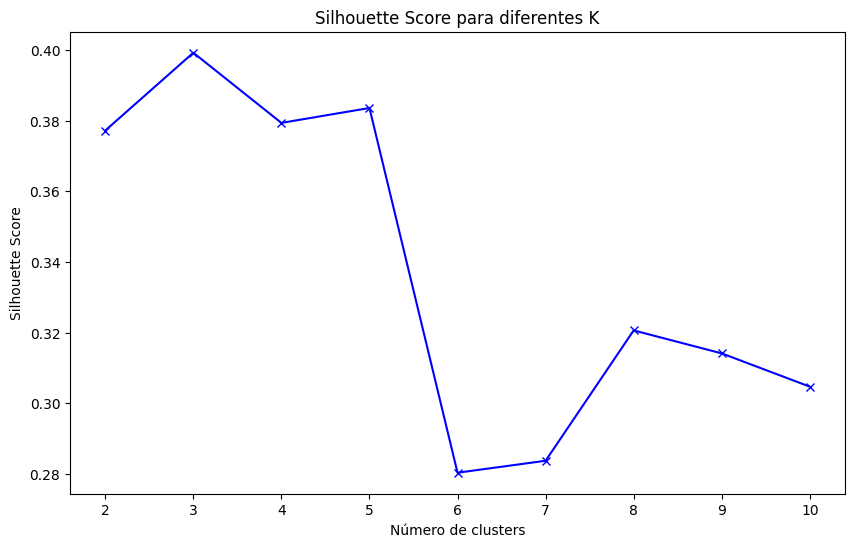

In [ ]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()


Según, el **gráfico del método del codo** muestra cómo cambia la suma de los errores cuadrados, aqui observamos una disminución considerable en la SSE de 2 a 4 clusters y luego un cambio más gradual después de 4.
Este cambio indica que a partir de 4 clusters, agregar más clusters no reduce sustancialmente la SSE.

De acuerdo a este método, 4 o 5 es un buen número de clusters, ya que marca el punto donde la reducción en SSE empieza a estabilizarse.

En este **gráfico, el Silhouette** Score es más alto para 2 clusters y disminuye al agregar más clusters, alcanzando un valor mínimo alrededor de 4.
Aunque el puntaje disminuye después de 2, hay un aumento leve en los clusters de 5 y 6, pero estos puntajes son más bajos que el de 2.


**Número Óptimo de Clusters**
Basándonos en ambos gráficos:

Si se prioriza la separación de los clusters: se podría elegir 2 clusters, ya que tiene el puntaje de Silhouette más alto.

Si prefiere un equilibrio entre separación y agrupamiento: podría elegir 4 clusters, ya que es el valor sugerido por el Método del Codo y el Silhouette Score sigue siendo aceptable aunque no sea el máximo.

**CONCLUSION:** 4 clusters es una buena elección ya que el método del codo muestra un punto de inflexión cerca de este valor, y la puntuación de Silhouette es máxima en 4 clusters.

In [ ]:
# Aplicar KMeans y K-Medoids (K-Medians)
optimal_k = 4  # Elegido basado en los gráficos

# Aplicar KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_preprocessed)

# Aplicar K-Medoids (aproximación a K-Medians)
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_preprocessed)

In [ ]:
kmeans_silhouette = silhouette_score(df_preprocessed, kmeans_labels)
kmedoids_silhouette = silhouette_score(df_preprocessed, kmedoids_labels)

# Obtener la inercia para KMeans
kmeans_inertia = kmeans.inertia_

# Para KMedoids, calculamos la suma de distancias (similar a la inercia en KMeans)
kmedoids_inertia = kmedoids.inertia_

# Mostrar los resultados
print(f"KMeans - Silhouette Score: {kmeans_silhouette}")
print(f"KMeans - Inercia (SSE): {kmeans_inertia}")
print(f"KMedoids - Silhouette Score: {kmedoids_silhouette}")
print(f"KMedoids - Inercia (Suma de distancias): {kmedoids_inertia}")

KMeans - Silhouette Score: 0.37935186261924114
KMeans - Inercia (SSE): 2858.257551411614
KMedoids - Silhouette Score: 0.23544586847645171
KMedoids - Inercia (Suma de distancias): 4662.748148846675


**ANÁLISIS:**

**Índice de Silhouette:**

KMeans - Silhouette Score: 0.3793
KMedoids - Silhouette Score: 0.2354

Un valor más alto indica una mejor calidad de los clústeres, así que aquí KMeans parece ser mejor en términos de separación y cohesión de los datos.

**Inercia (o suma de distancias en KMedoids):**
KMeans - Inercia (SSE): 2858.25
KMedoids - Suma de distancias: 4662.74

La inercia más baja de KMeans muestra que minimiza mejor las distancias cuadradas dentro de los clústeres en comparación con KMedoids en este caso.

En conclusión, según estos resultados, KMeans ofrece una mejor separación y agrupamiento para este conjunto de datos, mientras que para un Silhouette Score más alto y su inercia más baja.

In [ ]:
# DBSCAN

param_grid = {
    'eps': [2.0, 4.0, 6.0, 8.0, 10.0, 25],  # Distancia de radio
    'min_samples': [5, 10, 15]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el modelo
        labels = dbscan.fit_predict(df_preprocessed)

        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(df_preprocessed, labels)

            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Mejores Parámetros: {}
Mejor Silhouette Score: -1.0000


# Visualization of clusters

In [ ]:
# Categorical variable distribution among clusters
data2['KMeans_Cluster'] = kmeans_labels
data2['KMedoids_Cluster'] = kmedoids_labels

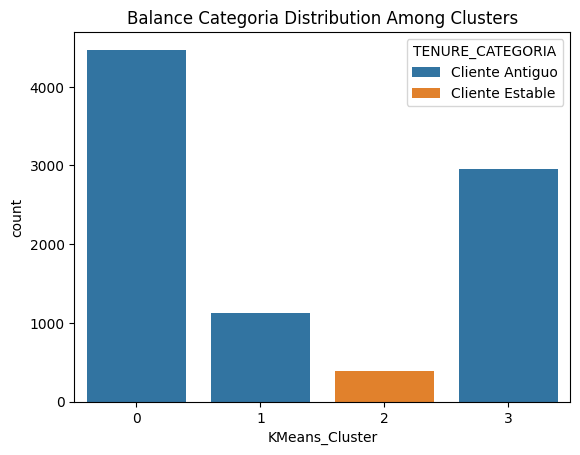

In [ ]:
sns.countplot(data=data2, x='KMeans_Cluster', hue='TENURE_CATEGORIA')
plt.title('Tenure Categoria Distribution Among Clusters')
plt.show()

# Interpretation of clusters

1. Cluster 0. Mayor datos de Clientes Antiguos y un pequeño número de Clientes Estables.
2. Cluster 1. Mayor datos de Clientes Antiguos y con muy pocos Clientes Estables.
3. Cluster 2. Mayor datos de Clientes Antiguos y muy pocos Clientes Estables.
4. Cluster 4. Menor datos de Clientes Antiguos y pocos Clientes Estables.

# Visualization of clusters (Others Graphics)

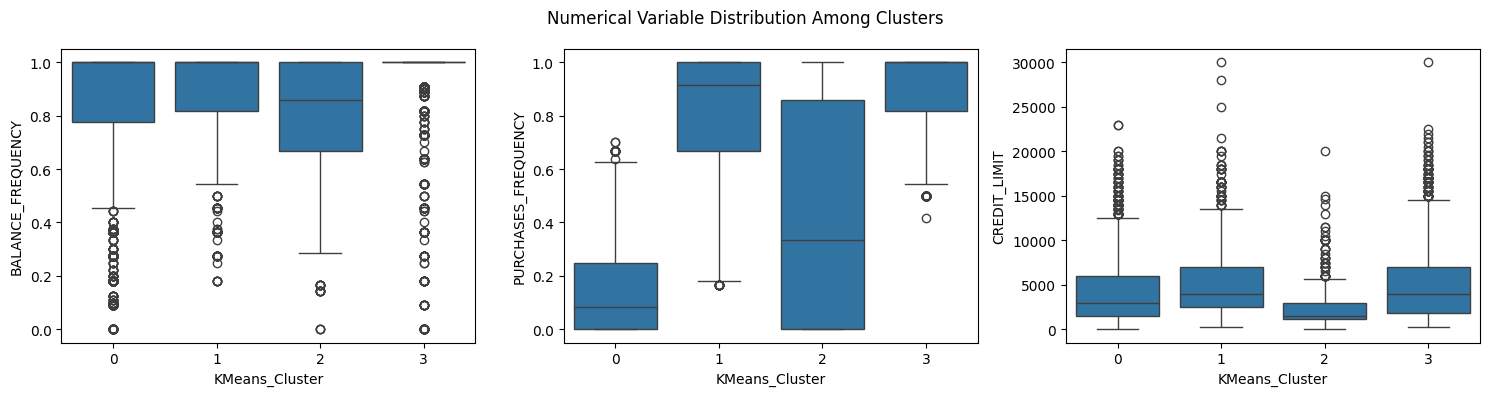

In [ ]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT']
for i in range(len(cols)):
    sns.boxplot(data=data2, x='KMeans_Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

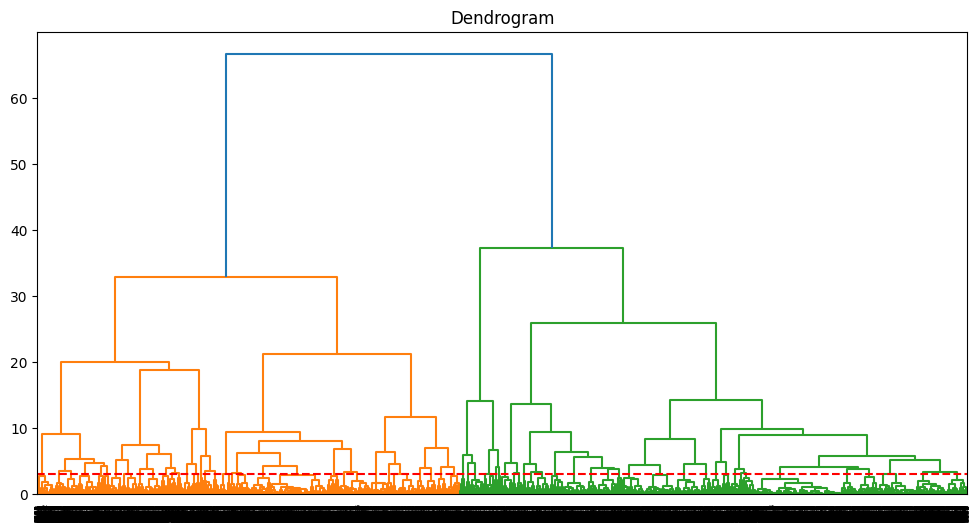

In [ ]:
# Plotting dendrogram to identify optimum no. of clusters
mergings = linkage(df_preprocessed, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Dendrogram')
plt.show()